# Samuels Viewer

Interface to functionality for viewing and comparing corpora processed with the Samuels Processor

In [1]:
import SamuelsCorpus as Sam
%matplotlib inline

Set up some filenames - these should be the base names (Samuels Viewer will add the _combined.csv and _cooccurrence.json endings for the individual files.  Only set the parentdir if these files are not stored in the current directory.)

In [2]:
#parentdir="/Users/juliewe/Dropbox/oldbailey/speech_corpora/theft/all/samuels_tagged"
filenames={'fnonl':'f_nonl','mnonl':'m_nonl','mleg':'m_leg'}
           

Load up files into a Samuels Viewer

In [3]:
mleg=Sam.Viewer(filenames['mleg'],colors=['g'])

Now we can play with the bag-of-words functionality in the SamuelsViewer

Size of corpus is 165824
(ZC [Grammatical Item],44079) : [('the', 10535), ('of', 3925), ('to', 3543), ('did', 3091), ('in', 2442), ('a', 1893), ('that', 1757), ('and', 1528), ('do', 1467), ('at', 1189)]
(ZF [Pronoun],24808) : [('you', 11066), ('it', 2140), ('your', 2067), ('he', 1882), ('what', 1748), ('that', 1596), ('him', 1174), ('them', 528), ('they', 503), ('she', 465)]
(NULL,14837) : [('?', 6548), (',', 4713), ('.', 2614), (';', 329), (')', 209), ('(', 209), ('-', 167), ('"', 30), (':', 12), ('!', 3)]
(AK.01.g [State/condition],6741) : [('was', 2500), ('is', 1166), ('were', 927), ('are', 751), ('been', 545), ('be', 499), ('being', 157), ('way', 75), ("'s", 62), ('am', 28)]
(ZA01 [Personal Name],2712) : [('mr.', 810), ('mrs.', 186), ('walsh', 46), ('aslett', 41), ('thomas', 40), ('swinton', 33), ('march', 30), ('kelly', 30), ('jones', 28), ('john', 27)]
(AP.04 [Number],2231) : [('last', 247), ('one', 226), ('two', 201), ('first', 136), ('three', 109), ('next', 60), ('five', 59), (

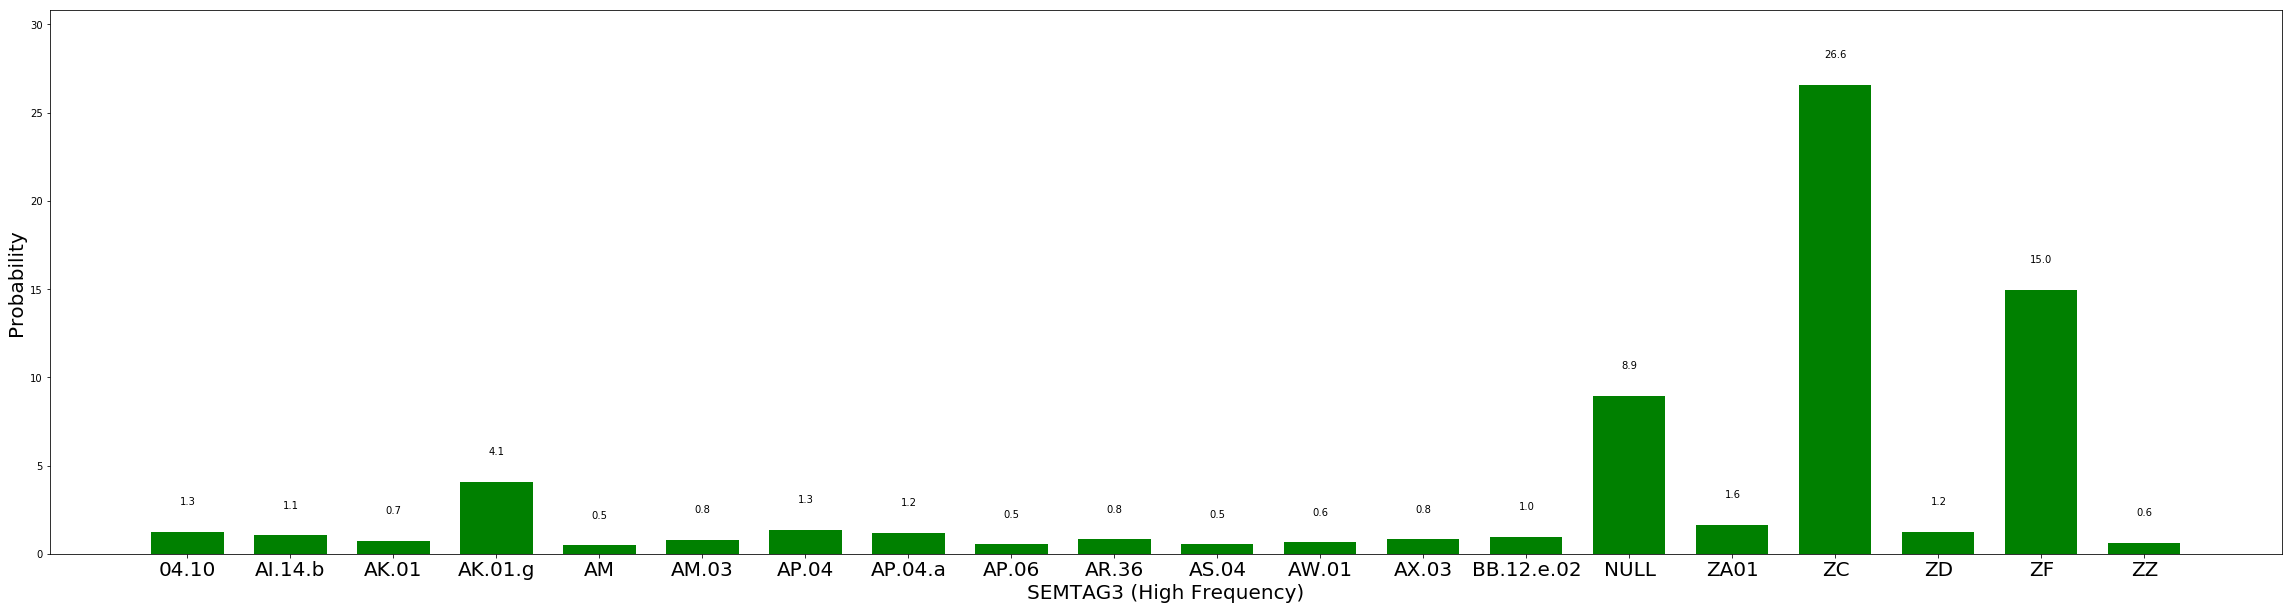

In [4]:
mleg_tagbag=mleg.make_bow(field='SEMTAG3',cutoff=20,displaygraph=True)

There are functions to find tags for words and words for tags e.g.,

In [5]:
print(mleg.find_tags('woman',field='SEMTAG3'))
print(mleg.find_tags('women',field='SEMTAG3'))

[('AD.03.b [Woman]', 173), ('AY.06.b [The common people]', 4), ('AY.01.g.01 [Married woman]', 3), ('BB.09.b.01 [Servant]', 1)]
[('AD.03.b [Woman]', 12)]


In [6]:
print(mleg.find_tags('man',field='SEMTAG3'))
print(mleg.find_tags('men',field='SEMTAG3'))

[('AD.03.a [Man]', 583), ('AD.03.h.01 [Old man]', 1)]
[('AD.03.a [Man]', 74)]


In [7]:
print(mleg.find_tags('child',field='SEMTAG3'))
print(mleg.find_tags('children',field='SEMTAG3'))

[('AD.03.d [Child]', 20), ('AY.01.e.02 [Child]', 2), ('ZA01 [Personal Name]', 1)]
[('AD.03.d [Child]', 6)]


In [8]:
print(mleg.find_text('AD.03.b'))

[('woman', 173), ('women', 12), ('wife', 5), ('piece', 1), ('mare', 1)]


In [9]:
print(mleg.find_text('AD.03.a'))

[('man', 583), ('men', 74), ('horse', 3), ('horses', 2), ('gentleman', 2), ('boy', 2), ('pieces', 1), ('piece', 1), ('birds', 1)]


In [10]:
print(mleg.find_text('AD.03.d'))

[('child', 20), ('children', 6)]


We can also view the co-occurrence distributions for tags.  

* Note that the number associated with the tag is a weight.  Currently it is set to be normalised localised PPMI.  Localised PPMI multiplies PPMI by probability.  Normalisation means that the vector is a unit vector (this won't change the order of saliency but typically makes all of the numbers smaller since the unit vector has length 1 ... the reason for doing this is that it is then more efficient to compute similarities between vectors).

* The list of words (and associated words) for the conceptual features ARE NOW context-specific i.e., words used to express this conceptual feature in the specific context of the given tag.

vard_lower
a        [9306, 18613, 28233, 37707, 47000, 82656, 8582...
the      [8987, 9004, 9116, 9152, 9165, 9174, 14554, 15...
these                                             [112433]
this     [16940, 22405, 27947, 28188, 29499, 34761, 522...
Name: fileid, dtype: object
(_det:ZC [Grammatical Item],0.8652375771084915) : [('the', 88), ('this', 43), ('a', 20), ('these', 1)]
vard_lower
young    [34762, 52259, 76216, 110251, 110684, 111632, ...
Name: fileid, dtype: object
(_amod:AF.05 [Plants defined by age/cycles],0.41137177570358824) : [('young', 26)]
vard_lower
are                      [102336, 159241, 160706, 182428]
be                                               [133794]
is      [17238, 57997, 93007, 101610, 120950, 125329, ...
was     [8986, 28232, 97263, 146770, 146807, 153604, 1...
were                                       [82655, 90801]
Name: fileid, dtype: object
(attr:AK.01.g [State/condition],0.12960101128555862) : [('is', 9), ('was', 7), ('are', 4), ('were', 2), ('be', 1

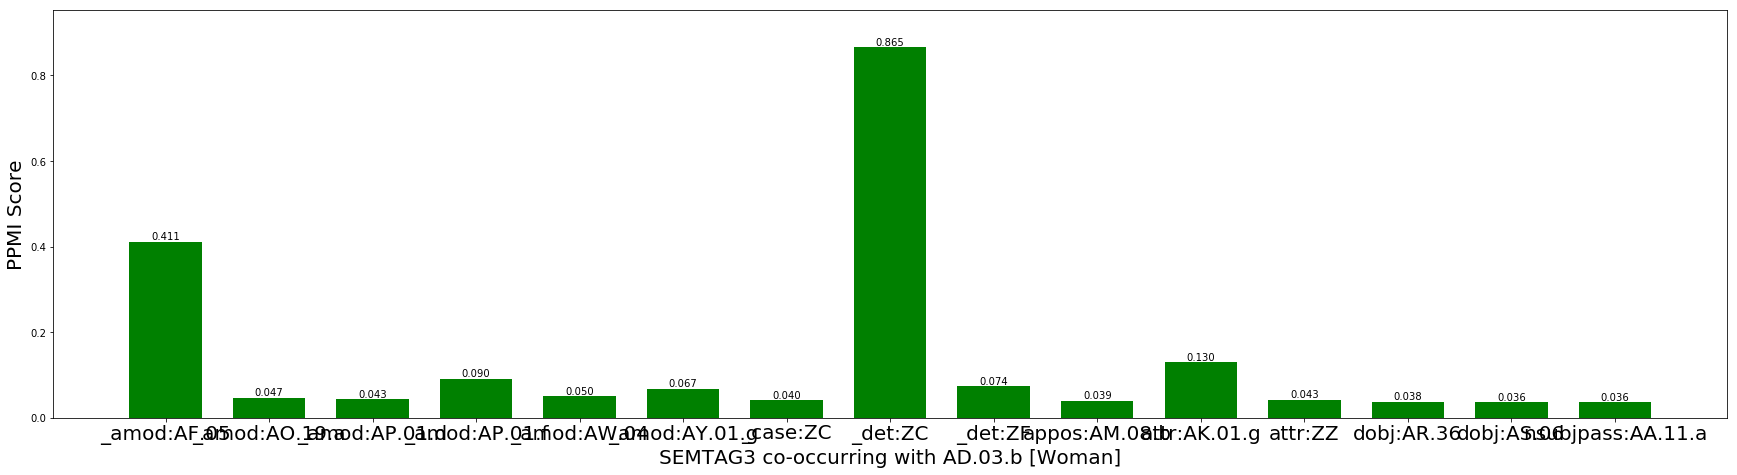

In [11]:
woman=mleg.get_top_features('AD.03.b',displaygraph=True,cutoff=15)

(_det, 0.8365017841994749)
(_amod, 0.4862699046894988)
(attr, 0.15349810790255566)
(_relcl, 0.14650943809815098)
(nsubj, 0.07918152963183712)
(dobj, 0.06844931769820553)
(_appos, 0.05091964157182276)
(pobj, 0.04651114025413175)
(_case, 0.03341802238871892)
(nsubjpass, 0.028253541342879072)


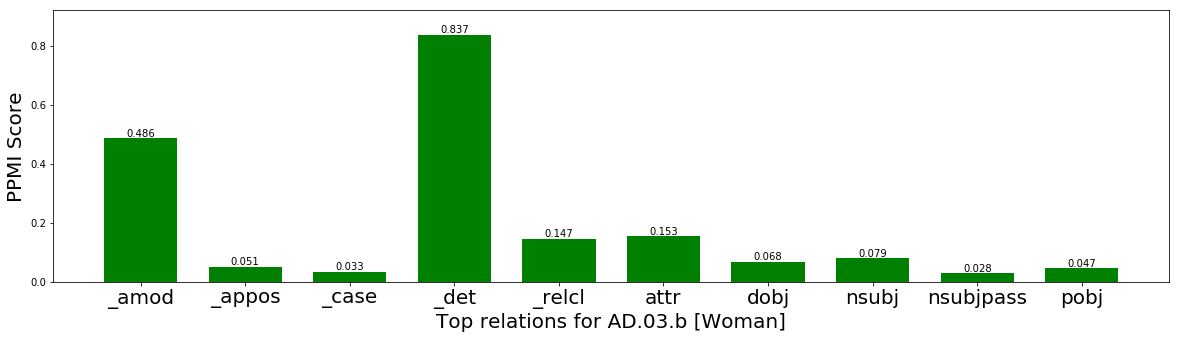

In [36]:
r=mleg.get_top_relations('AD.03.b',displaygraph=True,cutoff=10)

(_det, 0.8701749279767876)
(_amod, 0.3253232386807805)
(_relcl, 0.24065804452113365)
(attr, 0.23961782119402358)
(nsubj, 0.11673062650900645)
(dobj, 0.06955076677115313)
(_case, 0.031977319316120564)
(_acl, 0.02719852463422484)
(_nummod, 0.024591432434779667)
(pobj, 0.022776962932837017)


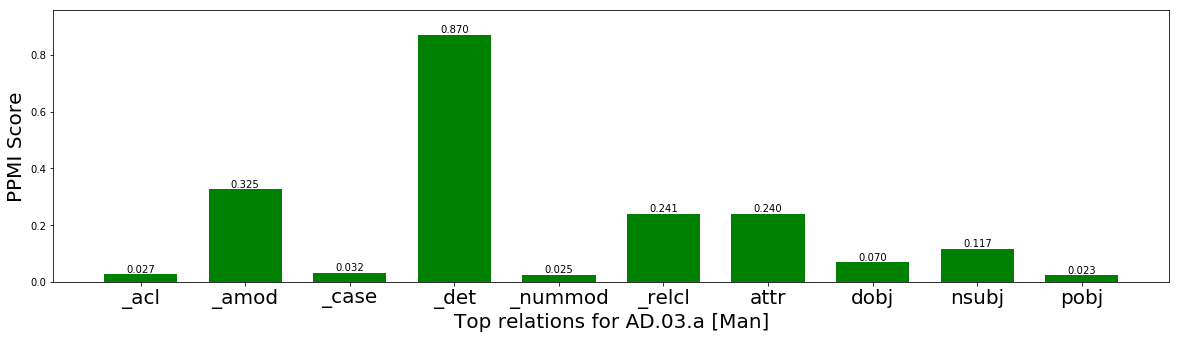

In [37]:
mr=mleg.get_top_relations('AD.03.a',displaygraph=True,cutoff=10)

(_det, 0.8862383169663842)
(_case, 0.3233304951994236)
(attr, 0.1956415867771171)
(poss, 0.16587162506834763)
(dobj, 0.15157853300611482)
(_amod, 0.06715715266147702)
(_relcl, 0.06493289441665695)
(appos, 0.04940726771131967)
(_appos, 0.04940726771131967)
(conj, 0.047541709797999564)


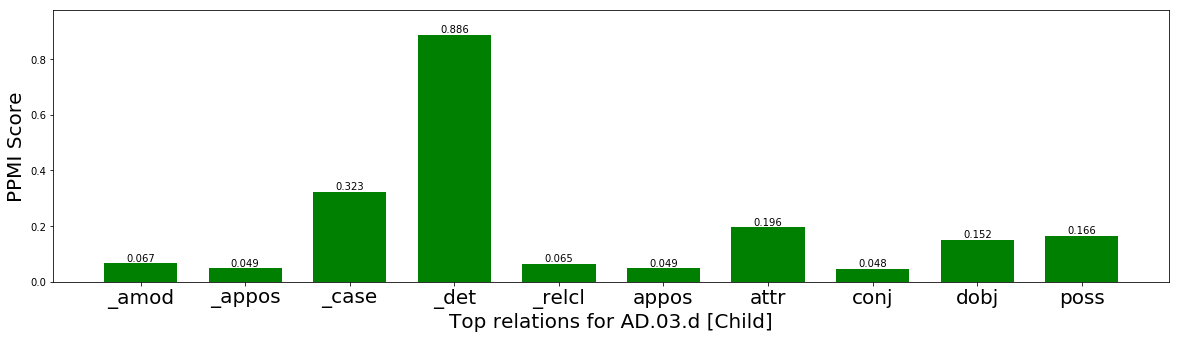

In [35]:
mr=mleg.get_top_relations('AD.03.d',displaygraph=True,cutoff=10)

vard_lower
young    [34762, 52259, 76216, 110251, 110684, 111632, ...
Name: fileid, dtype: object
(AF.05 [Plants defined by age/cycles],0.961691046419818) : [('young', 26)]
vard_lower
married    [47001, 92182, 100045, 128581]
Name: fileid, dtype: object
(AY.01.g [Marriage/wedlock],0.16745115517618195) : [('married', 4)]
vard_lower
poor    [29500, 70963, 100228]
Name: fileid, dtype: object
(AW.04 [Poverty],0.12258497737184515) : [('poor', 3)]
vard_lower
unfortunate    [84615, 85018, 111908]
Name: fileid, dtype: object
(AO.19.a [Calamity/misfortune],0.10776529418931746) : [('unfortunate', 3)]
vard_lower
married    [102338, 133796]
Name: fileid, dtype: object
(AP.07.e.05 [Fact/action of being joined/joining],0.09064843934487954) : [('married', 2)]
vard_lower
mad    [52434]
Name: fileid, dtype: object
(AU.04 [Intense emotion],0.056076406056189174) : [('mad', 1)]
vard_lower
bad    [28235, 82657]
Name: fileid, dtype: object
(AT.06 [Badness/evil],0.05408154977731289) : [('bad', 2)]
vard_lower

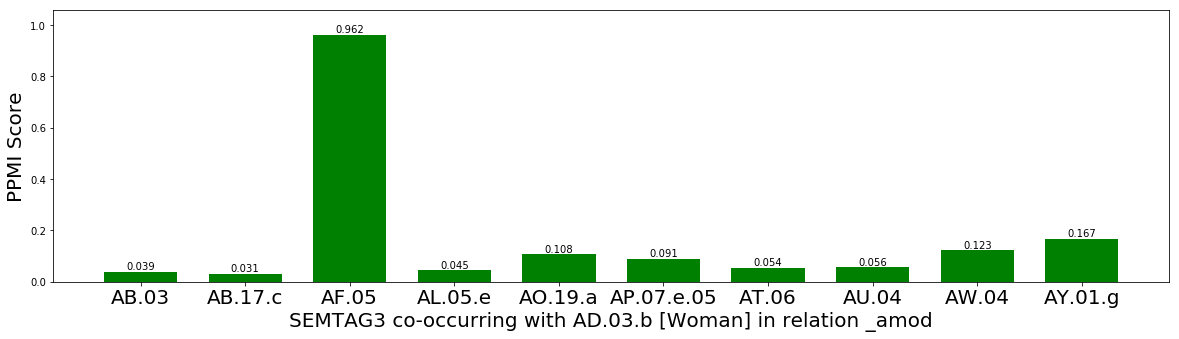

In [15]:
w=mleg.get_top_features('AD.03.b',rel='_amod',displaygraph=True)

vard_lower
young    [12030, 17413, 23373, 34788, 36752, 36783, 374...
Name: fileid, dtype: object
(AF.05 [Plants defined by age/cycles],0.8910282407459208) : [('young', 40)]
vard_lower
different                                             [163244]
other        [1675, 9041, 9064, 10276, 10295, 18966, 26297,...
Name: fileid, dtype: object
(AP.01.f [Difference],0.2450494877662125) : [('other', 36), ('different', 1)]
vard_lower
same    [1965, 10381, 10401, 28683, 37125, 41816, 4262...
Name: fileid, dtype: object
(AP.01.d [Identity],0.23591811714261993) : [('same', 26)]
vard_lower
drunken    [33378, 33777, 37767, 46010, 46029]
Name: fileid, dtype: object
(AG.01.ak.02.a [Excess in drinking],0.13872482943628223) : [('drunken', 5)]
vard_lower
tall      [74883, 77520, 146204]
taller                  [145085]
Name: fileid, dtype: object
(AB.17.c [Bodily height],0.11633142433755574) : [('tall', 3), ('taller', 1)]
vard_lower
honest         [96259, 128745, 150828, 180203]
respectable               

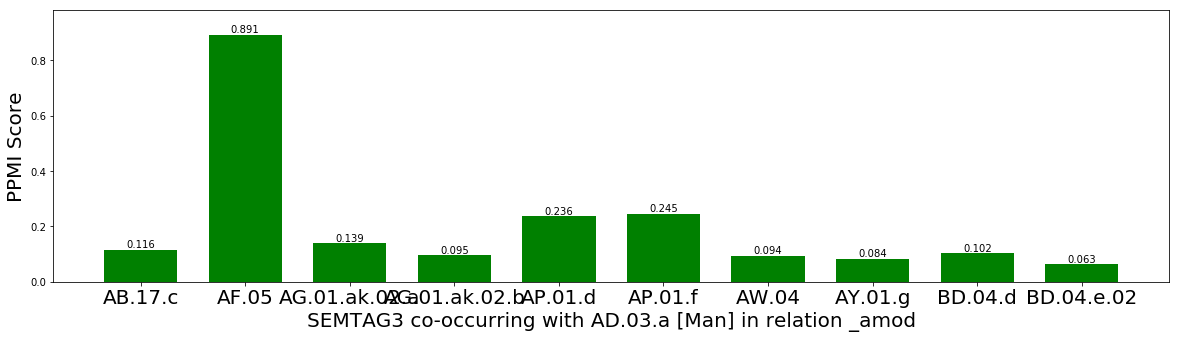

In [16]:
m=mleg.get_top_features('AD.03.a',rel='_amod',displaygraph=True)

vard_lower
little    [160873]
Name: fileid, dtype: object
(AS.11.a [Unimportance, triviality],0.819034112904566) : [('little', 1)]
vard_lower
young    [160887]
Name: fileid, dtype: object
(AF.05 [Plants defined by age/cycles],0.5737448229819861) : [('young', 1)]


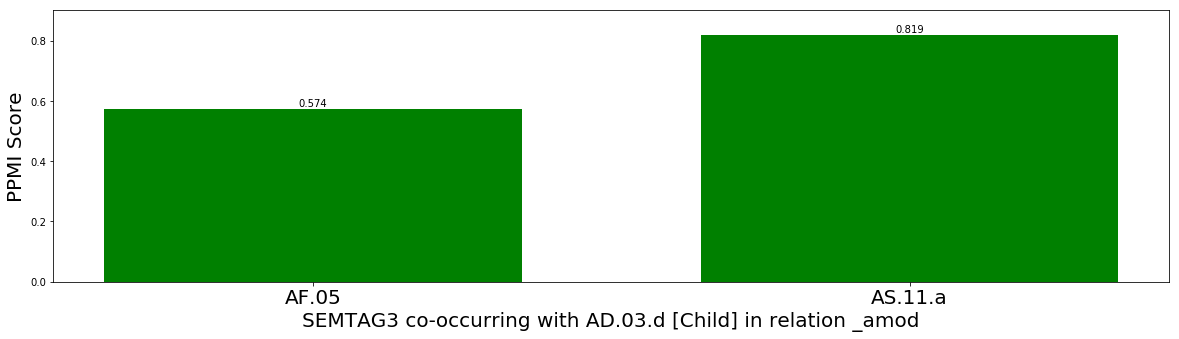

In [17]:
c=mleg.get_top_features('AD.03.d',rel='_amod',cutoff=10,displaygraph=True)

vard_lower
accuse    [110682, 125240, 161106]
Name: fileid, dtype: object
(AS.06 [Accusation, charge],0.5661835900050896) : [('accuse', 3)]
vard_lower
know     [18612, 48418, 126518, 161760, 163776, 176650]
known                                          [136902]
Name: fileid, dtype: object
(AR.36 [Knowledge],0.4283637324772247) : [('know', 6), ('known', 1)]
vard_lower
serving    [153554]
Name: fileid, dtype: object
(AO.15.d [Expediency],0.33323004947573326) : [('serving', 1)]
vard_lower
recommend    [27946]
Name: fileid, dtype: object
(AS.12.e.01 [Recommendation],0.2516899147846084) : [('recommend', 1)]
vard_lower
see     [86117, 119212, 119238, 169453]
seen                    [85833, 170367]
Name: fileid, dtype: object
(AI.14.b [Seeing/looking],0.2342147744941272) : [('see', 4), ('seen', 2)]
vard_lower
remember    [9173, 85016]
Name: fileid, dtype: object
(AR.35 [Memory, keeping in mind],0.22960458688020177) : [('remember', 2)]
vard_lower
wanted    [116686]
Name: fileid, dtype: object

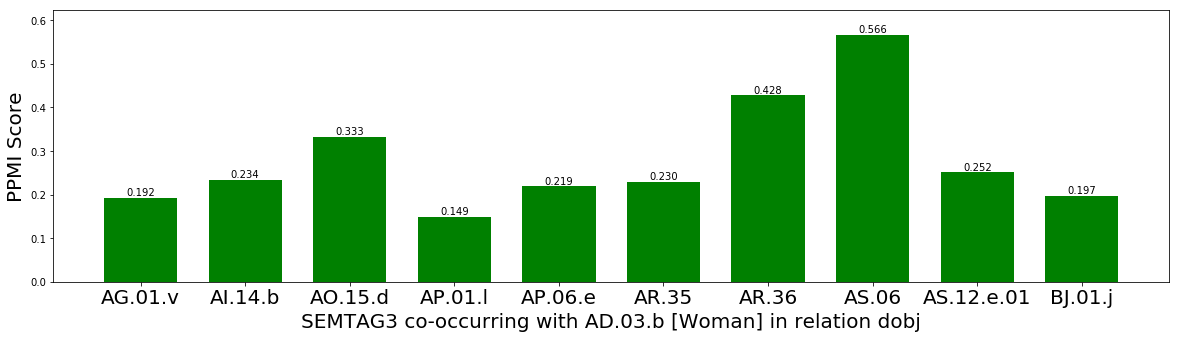

In [18]:
w=mleg.get_top_features('AD.03.b',rel='dobj',displaygraph=True)

vard_lower
had                                          [93227, 131203]
know       [30293, 30627, 30826, 35841, 36750, 36781, 521...
knowing                                              [28614]
known         [23371, 72514, 106408, 137345, 162408, 163012]
Name: fileid, dtype: object
(AR.36 [Knowledge],0.7253765241181376) : [('know', 20), ('known', 6), ('had', 2), ('knowing', 1)]
vard_lower
saw     [45223, 81422, 145167, 168289, 175577, 182824,...
see     [1673, 31401, 74876, 74991, 90857, 129580, 130...
seen                      [45041, 124362, 151210, 182893]
sees                                             [139631]
Name: fileid, dtype: object
(AI.14.b [Seeing/looking],0.43842277683083347) : [('see', 13), ('saw', 7), ('seen', 4), ('sees', 1)]
vard_lower
accuse     [88174, 89107, 109925, 169950, 174672]
accused                                  [182178]
Name: fileid, dtype: object
(AS.06 [Accusation, charge],0.32418207463550686) : [('accuse', 5), ('accused', 1)]
vard_lower
suffer    [622

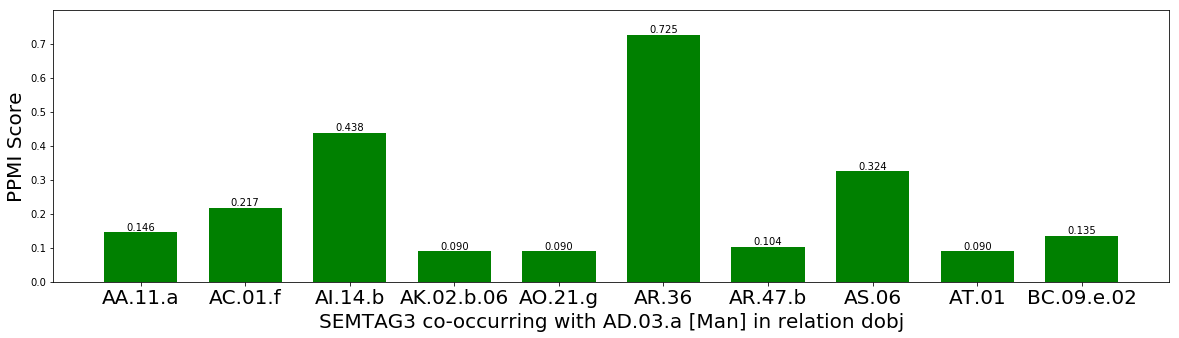

In [19]:
m=mleg.get_top_features('AD.03.a',rel='dobj',displaygraph=True)

vard_lower
wished    [183848]
Name: fileid, dtype: object
(AV.02.b [Desire],0.644781905389677) : [('wished', 1)]
vard_lower
was    [129346]
Name: fileid, dtype: object
(AM.08.c [The past],0.48696797017041693) : [('was', 1)]
vard_lower
brought    [101614]
Name: fileid, dtype: object
(AN.06 [Transference],0.3587365582730772) : [('brought', 1)]
vard_lower
had    [128045]
Name: fileid, dtype: object
(ZZ [Unrecognised],0.3082326728539877) : [('had', 1)]
vard_lower
found    [101630]
Name: fileid, dtype: object
(AO.11.b.01 [Finding/discovery],0.2811012479788373) : [('found', 1)]
vard_lower
have    [27191]
Name: fileid, dtype: object
(AR.01 [Mental capacity],0.21071611243228514) : [('have', 1)]


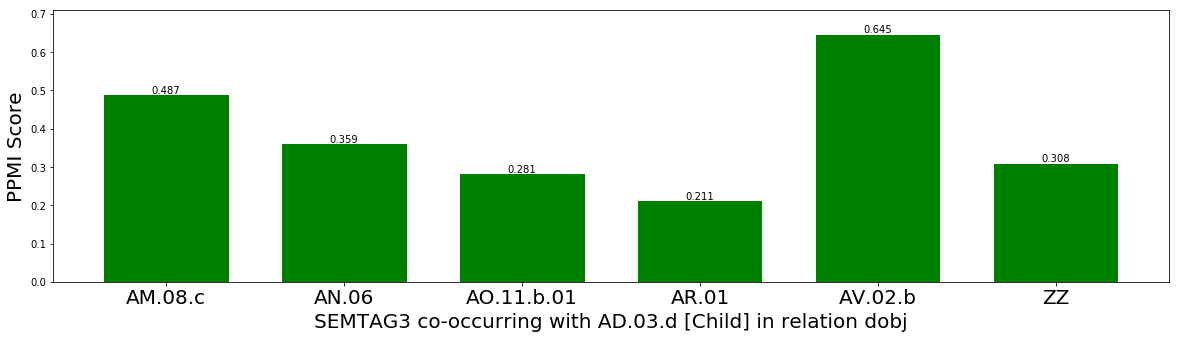

In [20]:
c=mleg.get_top_features('AD.03.d',rel='dobj',displaygraph=True)

vard_lower
was    [16121, 102053, 125376, 174885]
Name: fileid, dtype: object
(AM.08.c [The past],0.34531687630790736) : [('was', 4)]
vard_lower
excited    [76645]
Name: fileid, dtype: object
(AU.05 [Excitement],0.29050287304421274) : [('excited', 1)]
vard_lower
complained    [140797]
Name: fileid, dtype: object
(AU.22.b [Complaint],0.29050287304421274) : [('complained', 1)]
vard_lower
held    [145455]
Name: fileid, dtype: object
(AR.38 [Truth, validity, correctness],0.29050287304421274) : [('held', 1)]
vard_lower
appear    [163957]
Name: fileid, dtype: object
(BK.07.a [Performer],0.29050287304421274) : [('appear', 1)]
vard_lower
redeemed    [128386]
Name: fileid, dtype: object
(BF.21.i [Salvation, redemption],0.2729071121756101) : [('redeemed', 1)]
vard_lower
running    [132817]
Name: fileid, dtype: object
(AE.14.j.02 [Horse defined by purpose],0.23051151924924437) : [('running', 1)]
vard_lower
given    [9119, 76600, 150971]
Name: fileid, dtype: object
(AW.11 [Giving],0.20404162343155

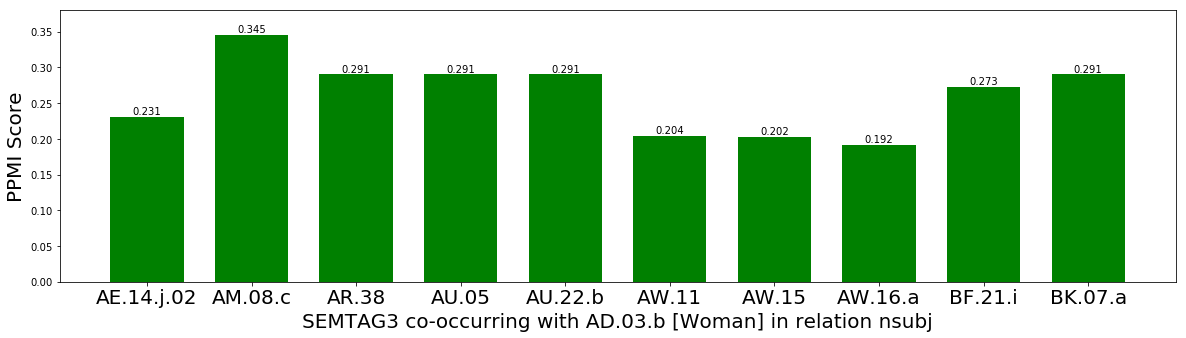

In [21]:
w=mleg.get_top_features('AD.03.b',rel='nsubj',displaygraph=True)

vard_lower
live                                       [20318, 122869]
lived    [3247, 30076, 46741, 47168, 98116, 99849, 174723]
Name: fileid, dtype: object
(AY.01.g.03 [Types of marriage custom/practice],0.5827192168504881) : [('lived', 7), ('live', 2)]
vard_lower
be                                                [15475]
been                       [2727, 108311, 132361, 161347]
is      [25600, 26311, 44991, 70647, 149789, 161589, 1...
was     [10297, 12556, 17415, 30850, 39948, 42626, 446...
were                      [69595, 118747, 170799, 170973]
Name: fileid, dtype: object
(AK.01.g [State/condition],0.3147305759656046) : [('was', 38), ('is', 9), ('were', 4), ('been', 4), ('be', 1)]
vard_lower
drunk    [102953, 152063]
Name: fileid, dtype: object
(AG.01.ak.02.a [Excess in drinking],0.20283734442879348) : [('drunk', 2)]
vard_lower
came     [39531]
come    [145384]
Name: fileid, dtype: object
(AP.01.k [Equality/equivalence],0.19361507580507384) : [('come', 1), ('came', 1)]
vard_lower


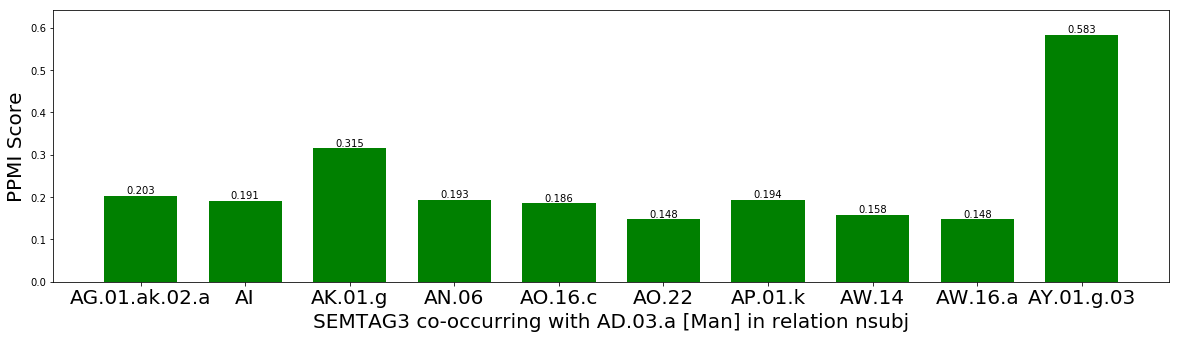

In [22]:
m=mleg.get_top_features('AD.03.a',rel='nsubj',displaygraph=True)

vard_lower
been                    [143389]
is      [101593, 151944, 160877]
Name: fileid, dtype: object
(AK.01.g [State/condition],0.8543910690186797) : [('is', 3), ('been', 1)]
vard_lower
lost    [151985]
Name: fileid, dtype: object
(AW.07 [Loss],0.519630542964054) : [('lost', 1)]


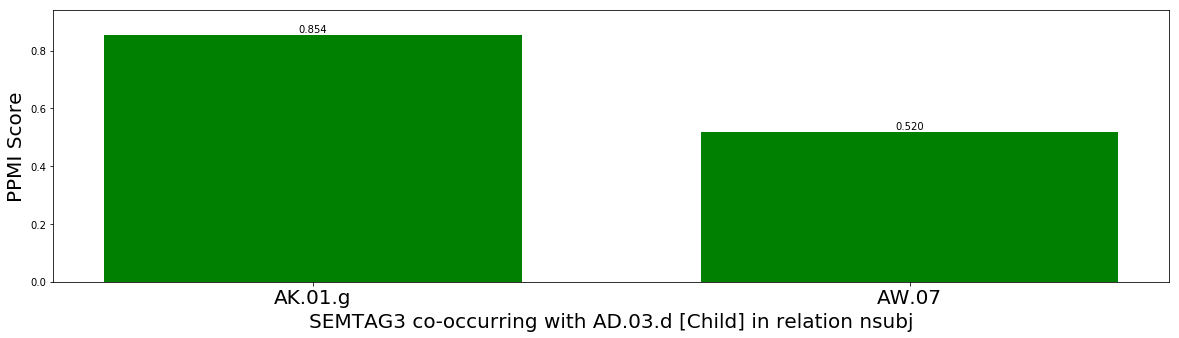

In [23]:
c=mleg.get_top_features('AD.03.d',rel='nsubj',displaygraph=True)

vard_lower
taken    [100231, 100472, 151439]
Name: fileid, dtype: object
(AA.11.a [Fine weather],0.8422112847322242) : [('taken', 3)]
vard_lower
taken    [162200]
Name: fileid, dtype: object
(AG.03.h [Hawking],0.3121752698817408) : [('taken', 1)]
vard_lower
dismissed    [47751]
Name: fileid, dtype: object
(BI.08 [Lack of work],0.3006613708818625) : [('dismissed', 1)]
vard_lower
committed    [161422]
Name: fileid, dtype: object
(AO.03 [Undertaking],0.2807370949107414) : [('committed', 1)]
vard_lower
found    [155076]
Name: fileid, dtype: object
(AO.11.b.01 [Finding/discovery],0.11239577173488688) : [('found', 1)]
vard_lower
sent    [122106]
Name: fileid, dtype: object
(AN.06 [Transference],0.106692862182034) : [('sent', 1)]


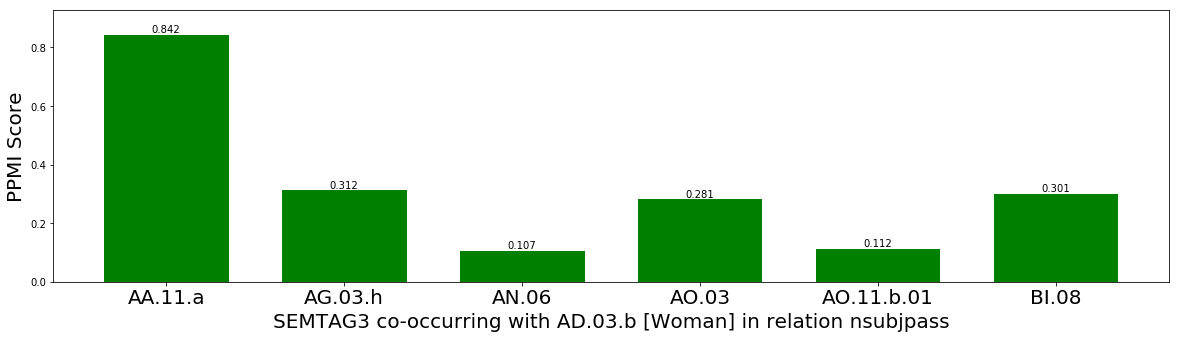

In [24]:
w=mleg.get_top_features('AD.03.b',rel='nsubjpass',displaygraph=True)

vard_lower
robbed    [163543, 163564, 163835]
Name: fileid, dtype: object
(AW.16.c [Robbery, piracy, raiding],0.5694292200277017) : [('robbed', 3)]
vard_lower
taken    [12228, 46701, 162998]
Name: fileid, dtype: object
(AA.11.a [Fine weather],0.3990979248633102) : [('taken', 3)]
vard_lower
employed    [17944, 99864]
Name: fileid, dtype: object
(BI.04.b [Labour supply],0.34763913150181974) : [('employed', 2)]
vard_lower
convicted    [1489, 72233]
Name: fileid, dtype: object
(BC.09.f.05 [Judging],0.3371974792424431) : [('convicted', 2)]
vard_lower
laid    [152376]
Name: fileid, dtype: object
(AL.05.w.04 [Action/fact of lying down/reclining],0.32107040968969364) : [('laid', 1)]
vard_lower
pressed    [163359]
Name: fileid, dtype: object
(AF.30 [Botany],0.32107040968969364) : [('pressed', 1)]
vard_lower
indicted    [167545]
Name: fileid, dtype: object
(BC.09.e.03 [Accusation/allegation/indictment],0.1992810809336622) : [('indicted', 1)]
vard_lower
charged    [34342]
Name: fileid, dtype: obj

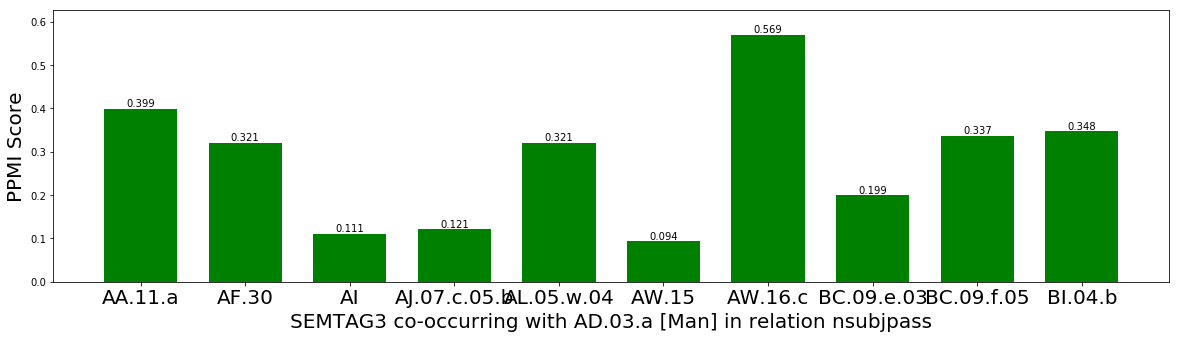

In [25]:
m=mleg.get_top_features('AD.03.a',rel='nsubjpass',displaygraph=True)

In [26]:
try:
    c=mleg.get_top_features('AD.03.d',rel='nsubjpass',displaygraph=True)
except:
    print("No nsubjpass relations found for AD.03.d")

No nsubjpass relations found for AD.03.d


vard_lower
a        [9306, 18613, 28233, 37707, 47000, 82656, 8582...
the      [8987, 9004, 9116, 9152, 9165, 9174, 14554, 15...
these                                             [112433]
this     [16940, 22405, 27947, 28188, 29499, 34761, 522...
Name: fileid, dtype: object
(ZC [Grammatical Item],0.9132889788387636) : [('the', 88), ('this', 43), ('a', 20), ('these', 1)]
vard_lower
now    [110250]
Name: fileid, dtype: object
(AM.08.b [The present (time)],0.3101656712058194) : [('now', 1)]
vard_lower
,    [161790]
Name: fileid, dtype: object
(NULL,0.26358903424843844) : [(',', 1)]
vard_lower
that    [2938]
Name: fileid, dtype: object
(AK.03.a [Cause/reason],0.01487677925721159) : [('that', 1)]


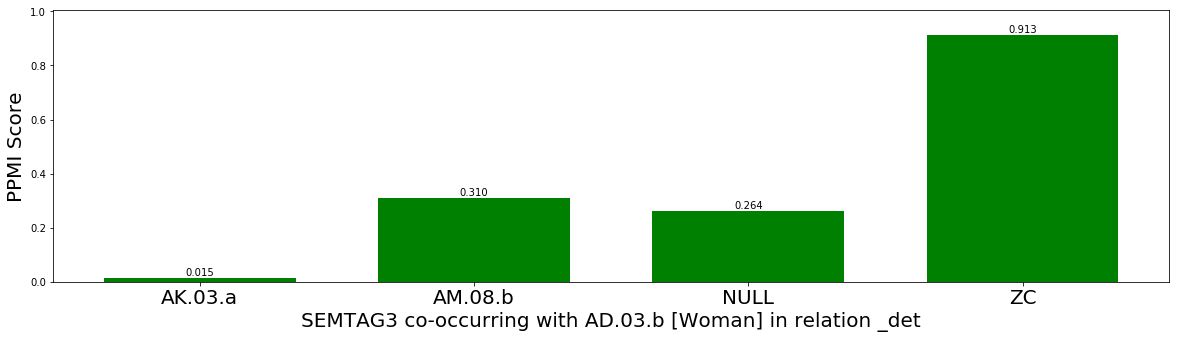

In [27]:
w=mleg.get_top_features('AD.03.b',rel='_det',displaygraph=True)

vard_lower
a        [1929, 5838, 8004, 9301, 13884, 13957, 13996, ...
an       [29189, 72312, 72340, 72515, 113560, 128744, 1...
that                                              [162409]
the      [17, 1578, 1791, 1964, 2711, 2723, 2774, 2812,...
these      [41440, 121691, 129648, 129687, 132150, 163332]
this     [812, 938, 1486, 3245, 3281, 4998, 12029, 1531...
those                                       [51611, 69593]
Name: fileid, dtype: object
(ZC [Grammatical Item],0.9618435524039243) : [('the', 310), ('this', 115), ('a', 102), ('an', 7), ('these', 6), ('those', 2), ('that', 1)]
vard_lower
another    [74877, 82239, 107433, 113435, 133245, 145084,...
Name: fileid, dtype: object
(ZZ [Unrecognised],0.26729253677806963) : [('another', 10)]
vard_lower
that    [49836]
Name: fileid, dtype: object
(AO.21.g [Care/carefulness/attention],0.04996907265533518) : [('that', 1)]
vard_lower
each    [170902]
Name: fileid, dtype: object
(AP.02.b [Individual character/quality],0.029430437522242076) :

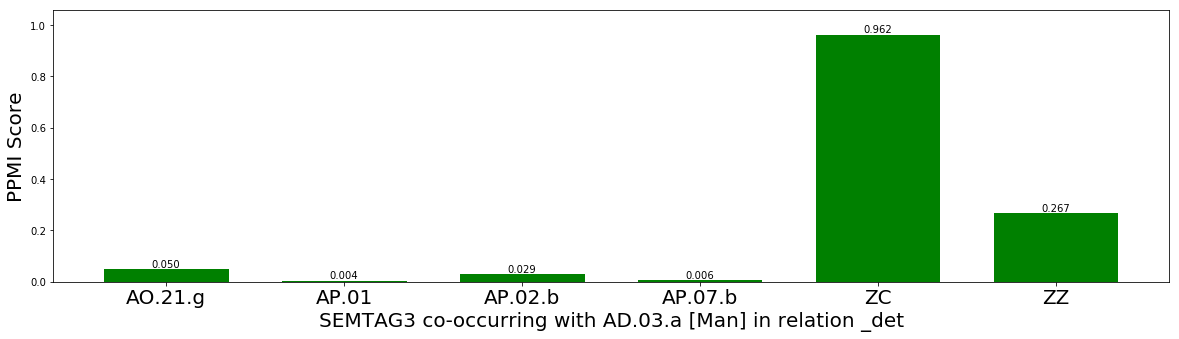

In [28]:
m=mleg.get_top_features('AD.03.a',rel='_det',displaygraph=True)

vard_lower
any    [22367]
Name: fileid, dtype: object
(AP.02.a [Generality],0.9492770467211822) : [('any', 1)]
vard_lower
a                                 [14391, 128047, 164090]
the     [14404, 70867, 76805, 101594, 101615, 101631, ...
this                                             [160858]
Name: fileid, dtype: object
(ZC [Grammatical Item],0.284374414148244) : [('the', 13), ('a', 3), ('this', 1)]
vard_lower
that    [151945, 160872]
Name: fileid, dtype: object
(ZF [Pronoun],0.13418003259111747) : [('that', 2)]


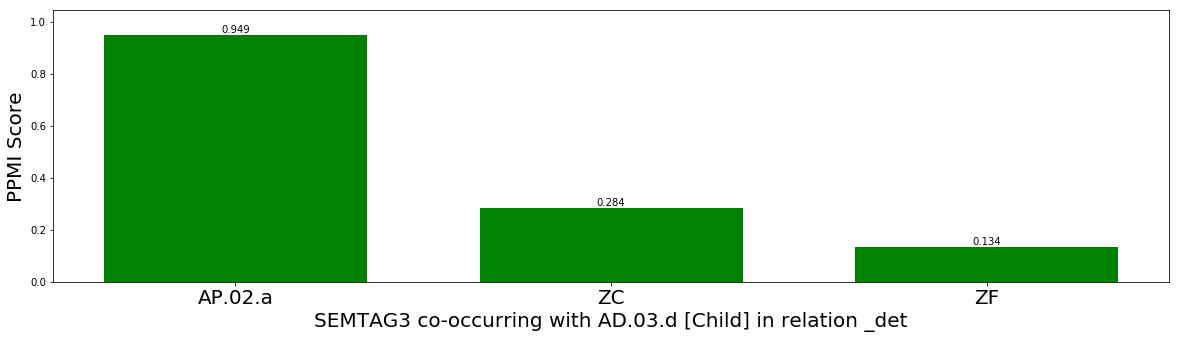

In [29]:
c=mleg.get_top_features('AD.03.d',rel='_det',displaygraph=True)

# Similar Concepts
We can find the similarity between 2 concepts in the given corpus

First, the similarities between WOMAN-MAN, WOMAN-CHILD and MAN-CHILD over the whole LPMI matrix (all grammatical relations)

We can also look at a particular relation.  We can see that MAN and WOMAN are similar in terms of their adjectival modifies and the verbs which are done to them, but disimilar in terms of the verbs they do.  On the other hand, WOMAN and CHILD and MAN and CHILD seem consistently dissimilar in all these relations.


In [30]:
rels=[None,'_amod','dobj','nsubj','_det','nsubjpass']
for rel in rels:
    print(rel)
    print("WOMAN-MAN: {}".format(mleg.find_similarity('AD.03.a','AD.03.b',rel)))
    print("MAN-CHILD: {}".format(mleg.find_similarity('AD.03.a','AD.03.d',rel)))
    print("WOMAN-CHILD: {}".format(mleg.find_similarity('AD.03.b','AD.03.d',rel)))
    print("-----")

None
WOMAN-MAN: 0.9347944124424766
MAN-CHILD: 0.6210182561200907
WOMAN-CHILD: 0.5830092674141701
-----
_amod
WOMAN-MAN: 0.9015932924902647
MAN-CHILD: 0.5112228402587189
WOMAN-CHILD: 0.5517652591914994
-----
dobj
WOMAN-MAN: 0.6121135064783157
MAN-CHILD: 0.00258601705990346
WOMAN-CHILD: 0.0
-----
nsubj
WOMAN-MAN: 0.11048609701587683
MAN-CHILD: 0.2689029932521177
WOMAN-CHILD: 0.0
-----
_det
WOMAN-MAN: 0.8784411157776288
MAN-CHILD: 0.2735236967171318
WOMAN-CHILD: 0.2597160183053214
-----
nsubjpass
WOMAN-MAN: 0.33746005219658787
Error: can't find vectors for those tags and relation
MAN-CHILD: 0
Error: can't find vectors for those tags and relation
WOMAN-CHILD: 0
-----


# Finding Nearest Neighbours


In [31]:
concepts=['AD.03.b','AD.03.a','AD.03.d']
for concept in concepts:
    for rel in rels:
        print('{} neighbours for {}'.format(concept,rel))
        print(mleg.find_knn(concept,rel))
        print("-----")

AD.03.b neighbours for None
[('AD.03.b [Woman]', 1.0), ('AD.03.a [Man]', 0.9347944124424766), ('BB.12.e.02 [Prisoner]', 0.865096175321488), ('BB.09.e.01.a [Confinement]', 0.860276380563296), ('BC.07.b [Law-enforcement/peace-officer]', 0.8452874434990217), ('BA.14.k.08.a [Officer/soldier of rank]', 0.8297236301941681), ('AD.03.d.01 [Boy]', 0.8289851321966392), ('BB.12.d.01 [Instrument/place of torture]', 0.791318871224162), ('AL.05.d.01 [An opening/aperture]', 0.7846714431445975), ('AO.16.a.02 [Refuge/shelter]', 0.7717271285260526)]
-----
AD.03.b neighbours for _amod
[('AD.03.b [Woman]', 0.9999999999999997), ('AD.03.c.01 [Youth/young man]', 0.961691046419818), ('BJ.01.y.02 [Expenditure]', 0.961691046419818), ('AY.06.b [The common people]', 0.961691046419818), ('ZA01 [Personal Name]', 0.9196843556669687), ('AD.03.a [Man]', 0.9015932924902647), ('AD.03.c.02 [Young woman]', 0.8108609187337582), ('AD.03.d [Child]', 0.5517652591914994), ('AY.06.a.02.c [Lord/lady]', 0.4921342985873679), ('AY.

[('AD.03.d [Child]', 0.9999999999999999), ('BH.14.j.01 [Sailor]', 0.9899290230579805), ('AJ.03.a [Weight/relative heaviness]', 0.9816445935145891), ('BJ.01.s.06 [Duty on goods]', 0.9568130496923403), ('BJ.01.m.05 [Medium of exchange/currency]', 0.9492770467211822), ('AG.02.g [Animal husbandry]', 0.9492770467211822), ('AT.17 [Dishonesty]', 0.9492770467211822), ('AW.15.a [Seizing, capture]', 0.9492770467211822), ('AR.53.a [Ancient Greek philosophy]', 0.9492770467211822), ('BJ.01.j.03 [Seller]', 0.9440907420414786)]
-----
AD.03.d neighbours for nsubjpass
Error: can't find vector for AD.03.d [Child] in pmi_matrix for relation nsubjpass
Error: can't find vector for AD.03.d [Child] in pmi_matrix for relation nsubjpass
Error: can't find vector for AD.03.d [Child] in pmi_matrix for relation nsubjpass
Error: can't find vector for AD.03.d [Child] in pmi_matrix for relation nsubjpass
Error: can't find vector for AD.03.d [Child] in pmi_matrix for relation nsubjpass
Error: can't find vector for AD.

## Comparing Corpora
We need a Samuels Comparator which takes a dictionary of filenames (as set up above) and allows us to compare one against the rest

In [32]:
test={'mleg':'m_leg','mnonl':'m_nonl'}

my_comp=Sam.Comparator(filenames)

Now we can compute the characteristic terms of one corpus compared to the others.  The key for the corpus which is to be compared against the others needs to be given.  

measure: default = 'llr'; others include 'pmi', 'kl' and 'jsd'

field: default = 'SEMTAG3'; any other field in the dataframe can be given e.g., 'SEMTAG1' or 'vard' but not extensively tested

cutoff: all distinctive tags will be returned for LLR, but this is used to cutoff the number for other measures and also in the list that is displayed automatically and is used in the graph

displaygraph: True to display a barchart of the terms 

Size of corpus is 165824
Size of corpus is 1468234
220 significantly characterising terms
Number of characteristic tags is 220
(AP.04.a [One], 3338.1235847105277) : [('any', 1858), ('only', 57), ('either', 20), ('alone', 4), ('sole', 2), ('single', 2), ('one', 2), ('solely', 1), ('singly', 1)]
(AM.08.c [The past], 1851.0324090835406) : [('was', 635), ('yesterday', 4), ('formerly', 4), ('sometime', 2), ('going', 1), ('back', 1)]
(AS.04 [Enquiry], 1558.6085077411187) : [('how', 478), ('whether', 339), ('question', 31), ('questions', 7), ('ask', 7), ('catechism', 6), ('asked', 5), ('questioned', 1), ('interview', 1)]
(AR.36 [Knowledge], 856.3356235723986) : [('know', 1001), ('known', 81), ('had', 81), ('knowledge', 47), ('knew', 47), ('have', 47), ('knowing', 18), ('acquaintance', 15), ('has', 11), ('of', 8)]
(BA.06 [Defence], 830.2204267101453) : [('were', 205), ('secured', 1), ('defend', 1)]
(AM.03 [Particular time], 767.9984113500268) : [('when', 980), ('day', 176), ('ever', 115), ('da

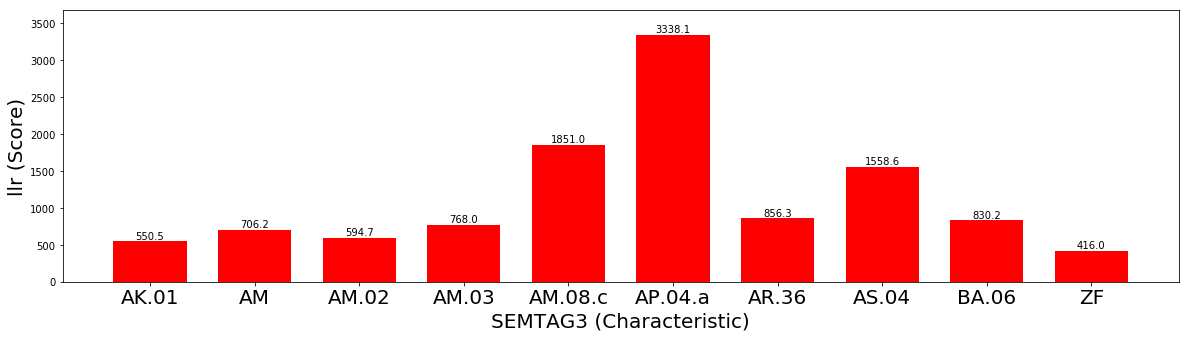

In [33]:
fdef_tags=my_comp.compute_surprises('mleg',measure='llr',field='SEMTAG3',cutoff=10,displaygraph=True)

Size of corpus is 1083003
Size of corpus is 1468234
162 significantly characterising terms
Number of characteristic tags is 162
(NULL, 929.3343896377992) : [(',', 68482), ('.', 44535), (';', 28994), ('-', 1731), (':', 1378), ('(', 660), (')', 652), ('"', 484), ('?', 390), ('!', 117)]
(BC.07.b [Law-enforcement/peace-officer], 312.8743979289566) : [('constable', 1131), ('watch-house', 312), ('watchman', 285), ('watchmen', 25), ('constables', 11), ('officer', 6)]
(AP.04 [Number], 204.94564186374555) : [('two', 3211), ('one', 2279), ('three', 1709), ('five', 1171), ('four', 1111), ('six', 921), ('ten', 843), ('last', 813), ('seven', 802), ('eight', 747)]
(BA.14.k.08.a [Officer/soldier of rank], 189.8198440018831) : [('officer', 1501), ('officers', 111), ('commanding', 1)]
(ZA02 [Geographical Name], 188.80140592289445) : [('st.', 628), ('holborn', 211), ('london', 175), ('smithfield', 159), ('whitechapel', 144), ('strand', 124), ('westminster', 110), ('giles', 104), ('east', 87), ('india', 

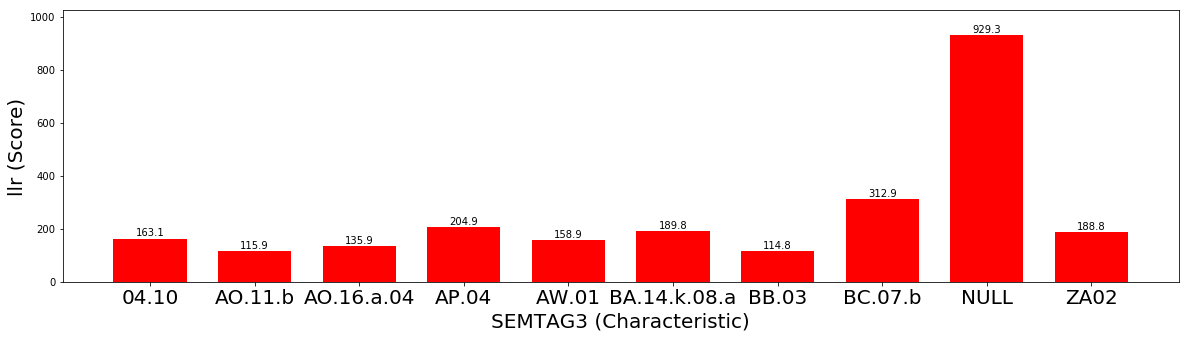

In [34]:
mwv_tags=my_comp.compute_surprises('mnonl',field='SEMTAG3',measure='llr',cutoff=10,displaygraph=True)